<a href="https://colab.research.google.com/github/Berendej/ML-hw-7/blob/main/ml_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/AB_NYC/

Mounted at /content/drive
AB_NYC_2019.csv


In [32]:
df = pd.read_csv('/content/drive/MyDrive/AB_NYC/AB_NYC_2019.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
# удаляем фичи явно не релевантные ( id, name, host_id ) а так же фичи
# которые показали низкую важность при анализе уже готовой модели.
# minimum_nights
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review',
              'reviews_per_month', 'calculated_host_listings_count',
              'neighbourhood', 'minimum_nights' ], axis = 1);

<Axes: xlabel='room_type', ylabel='price'>

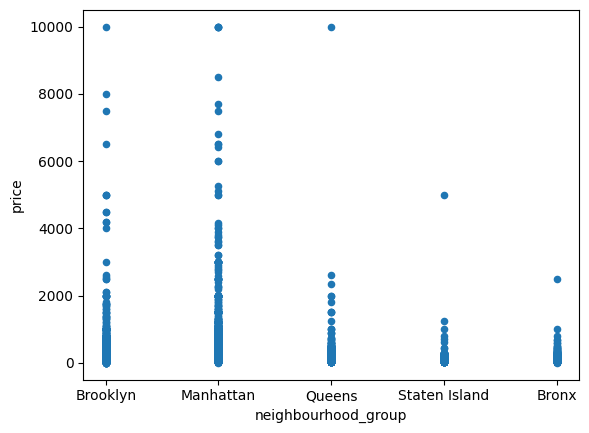

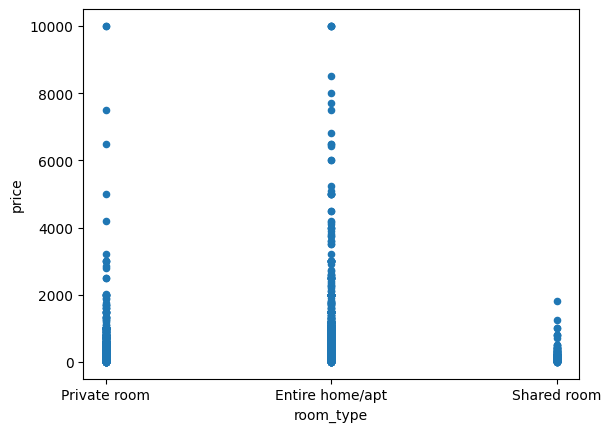

In [20]:
# визуализируйте базовые статистики данных: распределения признаков,
# матрицу попарных корреляций, постройте pair plots
import matplotlib as plt
import seaborn as sb
df.plot.scatter(x='neighbourhood_group', y='price')
df.plot.scatter(x='room_type', y='price')
#df.plot.scatter(x='neighbourhood', y='price')


In [34]:
#Попробуйте на основании имеющихся переменных создать новые,
#которые могли бы улучшить качество модели. Например, можно
#найти координаты Манхэттена (самого дорогого района) и при
#помощи широты и долготы, а также евклидова расстояния создать
#новую переменную — расстояние от квартиры до этого района.
#Возможно, такой признак будет работать лучше, чем просто широта и долгота.
# center of manhattan
from math import sqrt
def distance_to_center( row ):
  mnh_center = (40.7831, -73.9712)
  return sqrt( (row['latitude'] - mnh_center[0])**2 + (row['longitude'] - mnh_center[1])**2 )

df['to_center'] = df.apply( distance_to_center, axis=1 )
df['to_center']

,to_center
0,0.135615
1,0.032048
2,0.039120
3,0.098626
4,0.031271
...,...
48890,0.106707
48891,0.089719
48892,0.038850
48893,0.032429


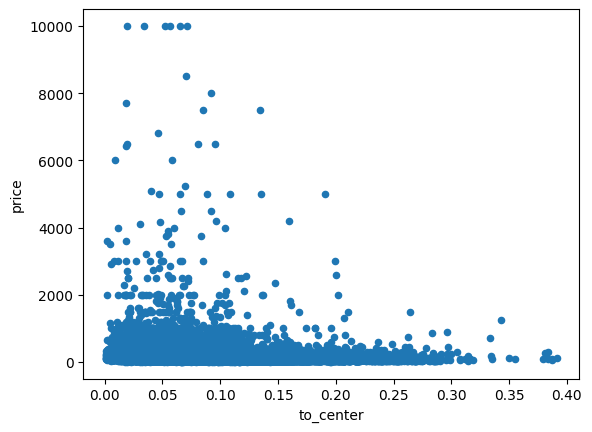

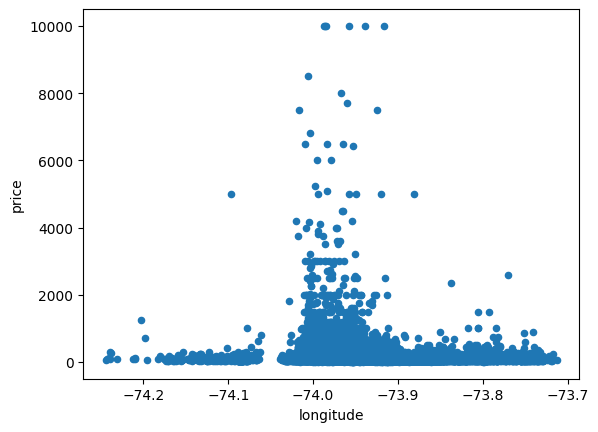

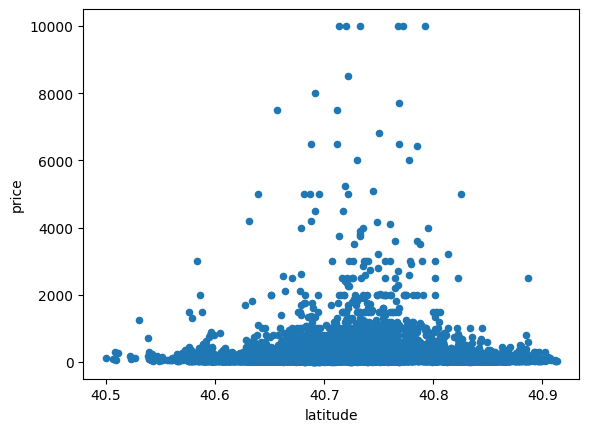

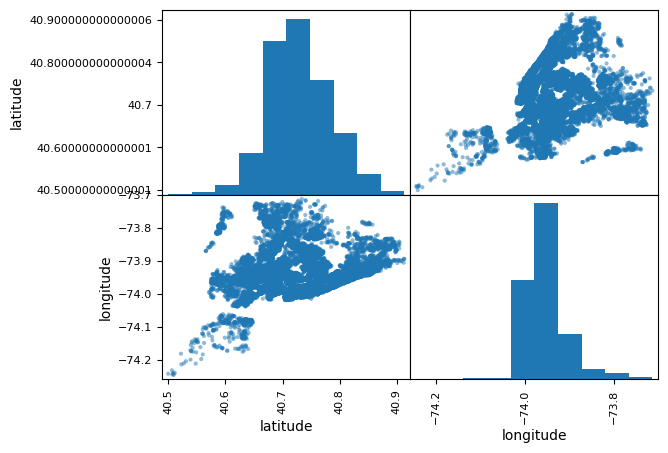

In [35]:
df.plot.scatter(x='to_center', y='price')
df.plot.scatter(x='longitude', y='price')
df.plot.scatter(x='latitude', y='price')
pd.plotting.scatter_matrix(df[['latitude','longitude']])
# да иметь один to_center вместо пару longitude latitude лучше
# по следующим причинам:
# 1) явно видно что они одинаково кореллируют с ценой
# чем ближе к центру, тем выше цена.
# 2) имеют "провалы" близко к центру ( пролив разделяющий город на 2 части)
# и линейная модель не сможет подстроится к такой нелинейности.
# убираем 'latitude','longitude'
df = df.drop(['latitude','longitude'], axis = 1);



In [36]:
# трансформируем категорийные признаки
# neighbourhood_group, neighbourhood, room_type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
text_fields = ['neighbourhood_group', 'room_type']
for fld in text_fields:
  df[fld] = le.fit_transform(df[fld])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  int64  
 1   room_type            48895 non-null  int64  
 2   price                48895 non-null  int64  
 3   number_of_reviews    48895 non-null  int64  
 4   availability_365     48895 non-null  int64  
 5   to_center            48895 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.2 MB


In [37]:
# Отложите 30% данных для тестирования.
# Постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
# Измерьте качество каждой и визуализируйте важность признаков.
# Сделайте интересные выводы :)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df.price,
                                                    test_size=0.30)
scaler = StandardScaler()
nan_cnt = np.isnan(X_train).sum()
print('nan before transform', nan_cnt)
X_train = scaler.fit_transform(X_train)
nan_cnt = np.isnan(X_train).sum()
print('nan after transform', nan_cnt)
X_test = scaler.transform(X_test)
df.info()

nan before transform neighbourhood_group    0
room_type              0
number_of_reviews      0
availability_365       0
to_center              0
dtype: int64
nan after transform 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  int64  
 1   room_type            48895 non-null  int64  
 2   price                48895 non-null  int64  
 3   number_of_reviews    48895 non-null  int64  
 4   availability_365     48895 non-null  int64  
 5   to_center            48895 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.2 MB


In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score


# Create and fit RidgeCV model
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]  # Alpha values to try
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold CV
ridge_cv.fit(X_train, y_train)

# Evaluate
print(f"Best alpha: {ridge_cv.alpha_}")
print(f"Test score: {ridge_cv.score(X_test, y_test):.3f}")
print(f"Number of features selected: {sum(ridge_cv.coef_ != 0)}")

feature_names = df.columns.drop('price')
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_cv.coef_,
    'Absolute_Coefficient': np.abs(ridge_cv.coef_)  # Magnitude = importance
}).sort_values('Absolute_Coefficient', ascending=False)
print(feature_importance)

Best alpha: 100.0
Test score: 0.090
Number of features selected: 5
               Feature  Coefficient  Absolute_Coefficient
1            room_type   -57.600014             57.600014
4            to_center   -26.150589             26.150589
3     availability_365    25.987123             25.987123
2    number_of_reviews   -14.691071             14.691071
0  neighbourhood_group     3.164786              3.164786


In [39]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)  # 5-fold CV
lasso_cv.fit(X_train, y_train)

# Evaluate
print(f"Best alpha: {lasso_cv.alpha_:.4f}")
print(f"Test R² score: {lasso_cv.score(X_test, y_test):.3f}")
print(f"Number of features selected: {sum(lasso_cv.coef_ != 0)}")
y_pred = lasso_cv.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
# R2 score получается неприлично низкий.

Best alpha: 0.0606
Test R² score: 0.090
Number of features selected: 5
R² Score: 0.0898


In [45]:
from sklearn.linear_model import ElasticNetCV
# Create and fit model
en_cv = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1],  # Range of L1/L2 mixing
    cv=5,
    n_jobs=-1,  # Use all CPU cores
    positive=True
)
en_cv.fit(X_train, y_train)


print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Best alpha: {en_cv.alpha_:.5f}")
print(f"Best l1_ratio: {en_cv.l1_ratio_:.3f}")
print(f"Test R²: {en_cv.score(X_test, y_test):.3f}")
print(f"Features selected: {sum(en_cv.coef_ != 0)}/{X_test.shape[1]}")

y_pred = en_cv.predict(X_test)
print(min(y_pred))

for p in list( zip(y_pred, y_test))[:100]:
  print(p)


R² Score: 0.0898
Best alpha: 0.06117
Best l1_ratio: 0.990
Test R²: 0.008
Features selected: 2/5
118.57667066426387
(np.float64(129.61821340240357), 125)
(np.float64(165.67139983675125), 48)
(np.float64(129.7684350125467), 90)
(np.float64(187.22845528490902), 175)
(np.float64(164.24454893301237), 475)
(np.float64(140.65975614054327), 55)
(np.float64(172.80718071116996), 100)
(np.float64(161.46519475274403), 165)
(np.float64(183.99843627421131), 129)
(np.float64(130.51954306326226), 100)
(np.float64(151.02504724041822), 150)
(np.float64(141.71130741154508), 160)
(np.float64(206.23174336063383), 135)
(np.float64(133.22353204583834), 42)
(np.float64(140.65975614054327), 499)
(np.float64(147.8703934274128), 280)
(np.float64(173.63314517433636), 60)
(np.float64(143.51396673326246), 180)
(np.float64(149.52283113898707), 169)
(np.float64(140.65975614054327), 2695)
(np.float64(142.98793670514084), 135)
(np.float64(181.36981248932753), 106)
(np.float64(130.36932145311914), 95)
(np.float64(131.72

Своими глазами посмотрел, что же тут получается и откуда такой низкий score. Глядя на предсказанные  и эталонные данные нельзя сказать что модель грубо ошибается.
 Понятно, что на стоимость квартир влияют намного больше факторов чем перечислено здесь. Факторов которые модель "не видит". Так же стоимость квартир очень нелинейна. Можно даже сказать субъективна, и линейный предсказатель  не лучший инструмент для этого случая.


In [55]:
# ну и все же попробую нелинейную нейронку натравить.
import tensorflow as tf
from tensorflow.keras import layers
# same 30% for test
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df.price,
                                                    test_size=0.10)
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
print(X_train_np.shape)

tf_model = tf.keras.Sequential([
  layers.Dense(5),
  layers.Dense(15),
  layers.Dense(1)
])
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
tf_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam(),
                     metrics=['mae'])
tf_model.fit(X_train_np, y_train_np, epochs=10)
y_pred = tf_model.predict(X_test)
print(y_pred)

for p in list( zip(y_pred, y_test))[:100]:
  print(p)
# И ничем не лучше. Видимо наука тут бессильна.
# Надо бы натравить сверточную нейронку
# "Тайный смысл под строчками искать".

(44005, 5)
Epoch 1/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 60897.8320 - mae: 119.8689
Epoch 2/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 57635.5781 - mae: 100.8461
Epoch 3/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 60208.6719 - mae: 84.6653
Epoch 4/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 49987.3359 - mae: 80.6577
Epoch 5/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 49396.3672 - mae: 78.9805
Epoch 6/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 55158.6992 - mae: 79.1672
Epoch 7/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 52888.3594 - mae: 78.5063
Epoch 8/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 47480.0117 - mae: 77.0565
Epoch 9/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 56285.7148 - mae: 78.5695
Epoch 10/10
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 44785.4531 - mae: 77.4198
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[199.60579]
 [186.56226]
 [168.80399]
 ...
 [246.01283]
 [103.26